In [1]:
import struct
import numpy as np
import flimview.io_utils as io
import flimview.flim as flim
import flimview.models as models
import flimview.plot_utils as pu
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy.ma as ma
import time
import h5py
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
h5file = 'test_sdt.h5'

In [3]:
io.viewH5(h5file)

File: test_sdt.h5
----> example_sdt: /example_sdt
--------> binned: /example_sdt/binned
------------> data: (256, 256, 256)
------------> mask: (256, 256)
--------> fit: /example_sdt/fit
------------> a1: (256, 256)
------------> a1_err: (256, 256)
------------> chi2: (256, 256)
------------> level: (256, 256)
------------> level_err: (256, 256)
------------> mask: (256, 256)
------------> residuals: (256, 256)
------------> tau1: (256, 256)
------------> tau1_err: (256, 256)
------------> tau2: (256, 256)
------------> tau2_err: (256, 256)
--------> raw: /example_sdt/raw
------------> data: (256, 256, 256)
------------> mask: (256, 256)


In [4]:
v0 = io.loadCube(h5file, group='example_sdt', kind='raw')
v0_bin = io.loadCube(h5file, 'binned', group='example_sdt')
v0_fit = io.loadFit(h5file,  group='example_sdt')

In [5]:
v0_bin.mask_peak(3.3)

### Figure 4

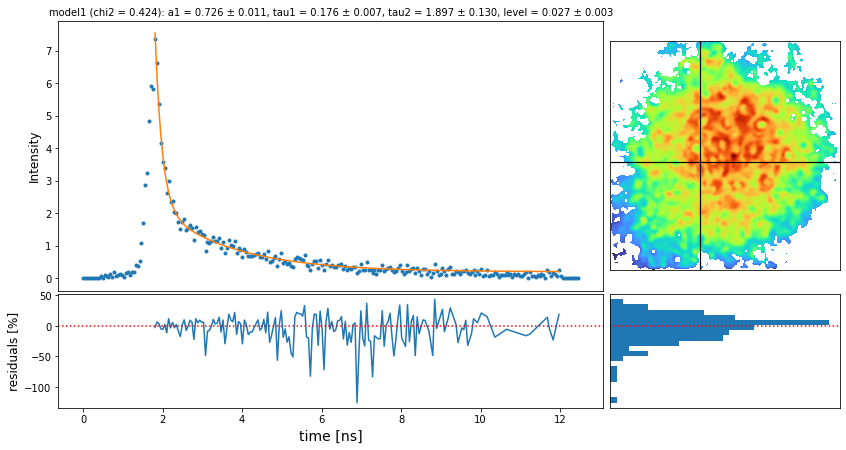

In [10]:
pu.plotFit(v0_fit,v0_bin, 100,120)
##plt.savefig('figures/viz_sdt.png',  bbox_inches='tight')

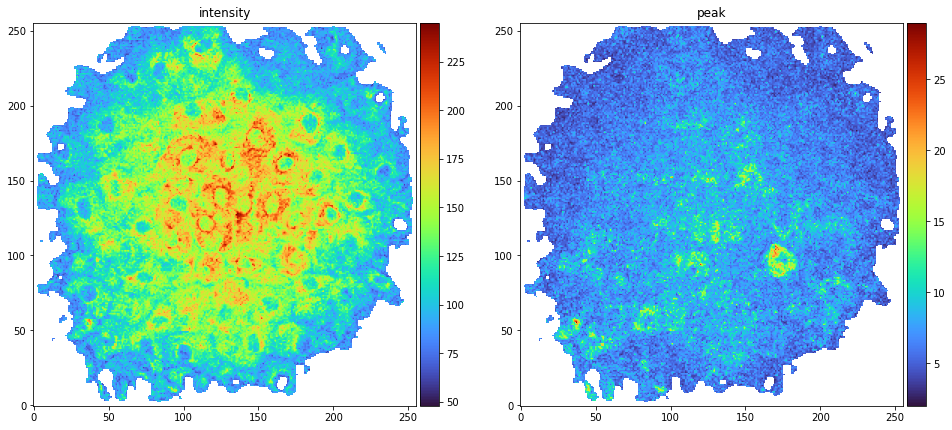

In [7]:
pu.plot2d(v0.intensity, title='intensity', extra_data=v0.peak, extra_title='peak', cmap=pu.turbo)

In [8]:
vmax = np.max(v0_bin.peak)
def fshow(ch):
    plt.figure(figsize=(6,6))
    g2 = v0_bin.data[:,:,ch]
    #pu.plot2d(g2, vmin=0, vmax=250)
    plt.imshow(g2, vmin=0, vmax=vmax, cmap=pu.turbo)
    #plt.colorbar()
    plt.show()

In [9]:
interactive_plot = interactive(fshow, ch=widgets.IntSlider(min=0,max=250,step=1,value=0))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(IntSlider(value=0, description='ch', max=250), Output(layout=Layout(height='450px'))), _…